# Convert Python Script to Jupyter Notebook
This notebook demonstrates how to convert a Python script for reading an Excel file into a Jupyter notebook. It outlines the steps, verifies code cells, and tests the notebook output.

## Verify Code Cells
Each code block from the original script is placed in its own cell below. You can run each cell independently to verify its output.

In [6]:
!pip install pandas matplotlib

  Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-macosx_10_13_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl (10.7 MB)
Using cached matplotlib-3.10.7-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp313-cp313-macosx

In [7]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Read the CSV file and display the first few rows
csv_path = "GH_selection_revise_FIXED.csv"
try:
    df = pd.read_csv(csv_path)
    print("CSV file loaded successfully.")
    display(df.head())
except Exception as e:
    print(f"Error reading the CSV file: {e}")

CSV file loaded successfully.


,project_name,isFork,commits,branches,defaultBranch,releases,contributors,license,watchers,stargazers,...,lastCommit,lastCommitSHA,hasWiki,isArchived,stars_region,forks_region,watchers_region,bugfix,improvingcode,subtype
0,raykrueger/hibernate-memcached,False,142,5,master,0,5.0,Apache License 2.0,26,111,...,2015-03-24T01:05:50,638dd68a70a7d11b14a8c98254db8cbe1b146ed9,True,True,2,2,2,0,0,NaN
1,mhroth/jvsthost,False,160,2,master,0,3.0,GNU Lesser General Public License v3.0,15,73,...,2012-06-14T08:02:18,0944bf84db9cc5bdac32c2ee4b6de8a43d8e6a0a,True,False,2,2,2,0,0,NaN
2,junit-team/junit4,False,2506,5,main,13,146.0,Eclipse Public License 1.0,593,8408,...,2023-02-07T03:44:22,e50487c97a8ae9a3168df89751457ba4cfab4d2a,True,False,3,3,3,0,0,NaN
3,yui/yuicompressor,False,513,2,master,42,42.0,Other,188,2917,...,2019-05-22T12:01:00,cf0497e53fffe4ddbd50e71518c40e0c07d120de,False,False,3,3,3,0,0,NaN
4,unclebob/fitnesse,False,6017,4,master,6,110.0,Other,155,1884,...,2023-01-30T03:38:59,d45dff8ebc30f0c0f883d6bcfdcf9ac2ef8b5bd1,True,False,3,3,3,0,0,NaN


# Basic Stats

In [10]:
# Basic statistics for 'bugfix' and 'improvingcode' columns
bugfix_stats = df['bugfix'].describe()
improvingcode_stats = df['improvingcode'].describe()

print("Bugfix Statistics:")
print(bugfix_stats)
print("\nImproving Code Statistics:")
print(improvingcode_stats)

Bugfix Statistics:
count    10673.000000
mean         0.005341
std          0.138494
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         12.000000
Name: bugfix, dtype: float64

Improving Code Statistics:
count    10673.000000
mean         0.031294
std          0.327058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: improvingcode, dtype: float64


### Calculate the number of "Bug Fix" and "Improving Code" Recommendations Per GH Group

In [11]:
grouped_df = df.groupby(['stars_region', 'forks_region', 'watchers_region'])
group_sums = grouped_df[['bugfix', 'improvingcode']].sum()
print(group_sums)

                                           bugfix  improvingcode
stars_region forks_region watchers_region                       
1            1            1                     5             39
2            2            2                    15            122
3            3            3                    37            173


### Count the number of projects in each group

In [12]:
group_counts = grouped_df.size()
print(group_counts)

stars_region  forks_region  watchers_region
1             1             1                  2103
2             2             2                  5073
3             3             3                  3497
dtype: int64


# Plot a Graph

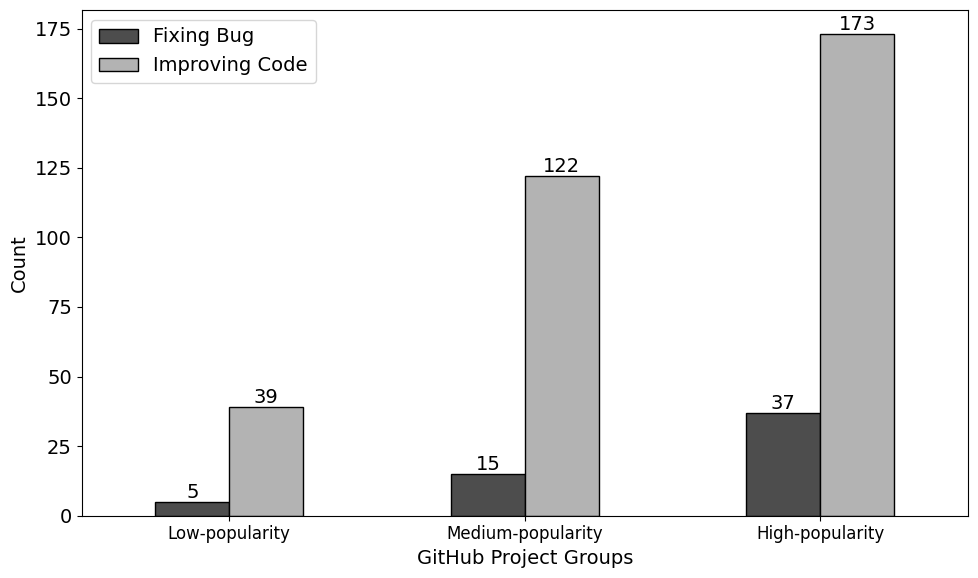

In [14]:
# Set default font size
plt.rcParams.update({'font.size': 14})

# Plot bar chart in grayscale
ax = group_sums.plot(
    kind='bar',
    figsize=(10, 6),
    color=['#4d4d4d', '#b3b3b3'],  # two shades of gray
    edgecolor='black'
)

ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('GitHub Project Groups', fontsize=14)
# ax.set_title('Number of Code Recommendations Per GitHub Group', fontsize=14)
ax.set_xticklabels(['Low-popularity', 'Medium-popularity', 'High-popularity'], rotation=0, fontsize=12)
ax.legend(['Fixing Bug', 'Improving Code'], fontsize=14)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=14
    )

plt.yticks(fontsize=14)
plt.tight_layout()

# Save as PDF
plt.savefig("github_groups_chart_greyscale.pdf", format="pdf", bbox_inches='tight')
plt.show()